In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2024-08-29 19:54:07--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.207, 172.253.118.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  20.6MB/s    in 4.0s    

2024-08-29 19:54:12 (16.3 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import zipfile

localzip = '/tmp/cats_and_dogs_filtered.zip'
zipref = zipfile.ZipFile(localzip, 'r')
zipref.extractall('/tmp')
zipref.close()

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
base_dir = os.path.join('/tmp/cats_and_dogs_filtered')

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28,28),
    color_mode='grayscale',
    class_mode='binary'
)

valid_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(28,28),
    color_mode='grayscale',
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


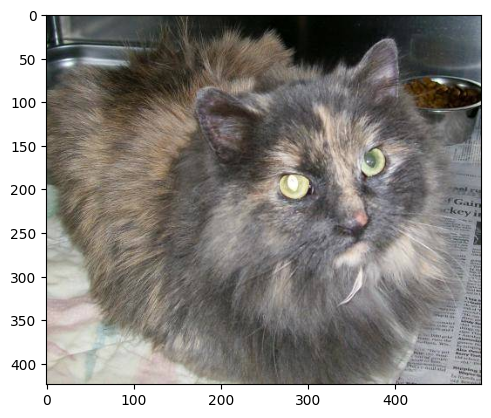

In [6]:
image_path_cat = os.path.join(train_dir, 'cats')
cat_train_list = os.listdir(image_path_cat)

import matplotlib.image as mpi
plt.imshow(mpi.imread(os.path.join(image_path_cat, cat_train_list[0])))

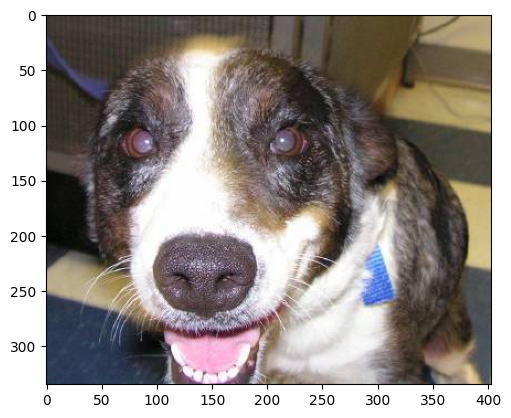

In [7]:
image_path_dog = os.path.join(train_dir, 'dogs')
dog_train_list = os.listdir(image_path_dog)

import matplotlib.image as mpi
plt.imshow(mpi.imread(os.path.join(image_path_dog, dog_train_list[0])))

# LeNet implementation

In [8]:
model = keras.Sequential()
model.add(keras.Input(shape=(28,28,1), name='InputLayer'))
model.add(keras.layers.Conv2D(6, (5,5), padding='same', strides=(1,1), name='ConvLayer1', activation='tanh'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), name='PoolLayer1'))
model.add(keras.layers.Conv2D(16, (5,5), padding='valid', strides=(1,1), name='ConvLayer2', activation='tanh'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), name='PoolLayer2'))
model.add(keras.layers.Flatten(name='FlattenLayer'))
model.add(keras.layers.Dense(120, activation='sigmoid', name='DenseLayer1'))
model.add(keras.layers.Dense(84, activation='sigmoid', name='DenseLayer2'))
model.add(keras.layers.Dense(1, activation='sigmoid', name='OutputLayer'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ ConvLayer1 (Conv2D)                  │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ PoolLayer1 (MaxPooling2D)            │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ConvLayer2 (Conv2D)                  │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ PoolLayer2 (MaxPooling2D)            │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FlattenLayer (Flatten)               │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ DenseLayer1 (Dense)                  │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ DenseLayer2 (Dense)                  │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 1)                   │              85 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,941 (238.05 KB)

 Trainable params: 60,941 (238.05 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=['acc'])

In [10]:
history = model.fit(train_generator, epochs=10, batch_size=32, validation_data=valid_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - acc: 0.5035 - loss: 0.7707 - val_acc: 0.4720 - val_loss: 0.6964
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - acc: 0.4953 - loss: 0.6961 - val_acc: 0.5060 - val_loss: 0.6963
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - acc: 0.5110 - loss: 0.6954 - val_acc: 0.4810 - val_loss: 0.6951
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - acc: 0.5032 - loss: 0.6954 - val_acc: 0.4780 - val_loss: 0.6956
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - acc: 0.4948 - loss: 0.6943 - val_acc: 0.5150 - val_loss: 0.6943
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - acc: 0.4857 - loss: 0.6952 - val_acc: 0.5150 - val_loss: 0.6938
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - acc: 0.5093 - loss: 0.6942 - val_acc: 0.5110 - val_loss: 0.6929
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - acc: 0.5026 - loss: 0.6922 - val_acc: 0.5530 - val_loss: 0.6926
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - acc: 0.5330 - loss:

In [11]:
acc, val_acc = history.history['acc'], history.history['val_acc']
loss, val_loss = history.history['loss'], history.history['val_loss']

epochs = ([i for i in range(1,11)])

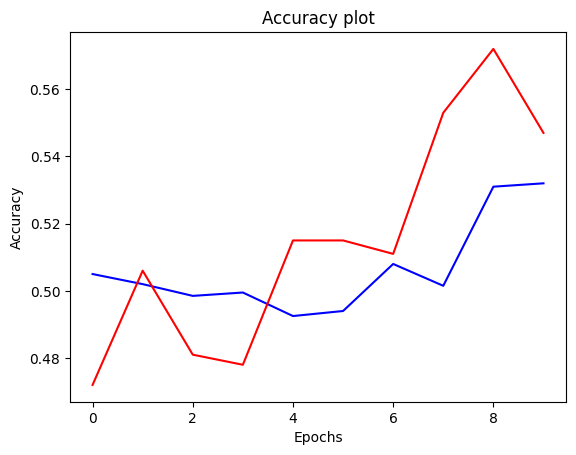

In [12]:
plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy plot')
plt.show()

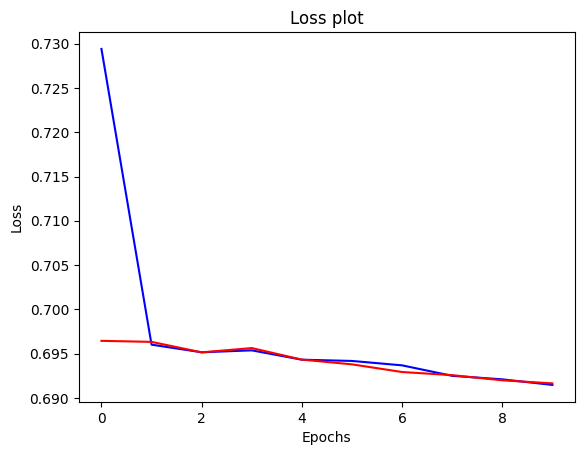

In [13]:
plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Loss plot')
plt.show()

# AlexNet implementation

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    class_mode='binary'
)

valid_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
model = keras.Sequential()
model.add(keras.Input(shape=(224,224,3), name='InputLayer'))
model.add(keras.layers.Conv2D(96, (11,11), strides=(4,4), padding='valid', activation='relu', name='ConvLayer1'))
model.add(keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2), name='PoolLayer1'))
model.add(keras.layers.Conv2D(256, (5,5), padding='same', activation='relu', name='ConvLayer2'))
model.add(keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2), name='PoolLayer2'))
model.add(keras.layers.Conv2D(384, (3,3), padding='same', activation='relu', name='ConvLayer3'))
model.add(keras.layers.Conv2D(384, (3,3), padding='same', activation='relu', name='ConvLayer4'))
model.add(keras.layers.Conv2D(256, (3,3), padding='same', activation='relu', name='ConvLayer5'))
model.add(keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2), name='PoolLayer3'))
model.add(keras.layers.Flatten(name='FlattenLayer'))
model.add(keras.layers.Dense(4096, activation='relu', name='DenseLayer1'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(4096, activation='relu', name='DenseLayer2'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid', name='OutputLayer'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ ConvLayer1 (Conv2D)                  │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ PoolLayer1 (MaxPooling2D)            │ (None, 26, 26, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ConvLayer2 (Conv2D)                  │ (None, 26, 26, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ PoolLayer2 (MaxPooling2D)            │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ConvLayer3 (Conv2D)                  │ (None, 12, 12, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ConvLayer4 (Conv2D)                  │ (None, 12, 12, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ConvLayer5 (Conv2D)                  │ (None, 12, 12, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ PoolLayer3 (MaxPooling2D)            │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FlattenLayer (Flatten)               │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ DenseLayer1 (Dense)                  │ (None, 4096)                │      26,218,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ DenseLayer2 (Dense)                  │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,751,105 (178.34 MB)

 Trainable params: 46,751,105 (178.34 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=['acc'])

In [18]:
history = model.fit(train_generator, epochs=10, batch_size=32, validation_data=valid_generator)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 211ms/step - acc: 0.5165 - loss: 0.6963 - val_acc: 0.5000 - val_loss: 0.6934
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - acc: 0.5183 - loss: 0.6935 - val_acc: 0.5000 - val_loss: 0.6916
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - acc: 0.5655 - loss: 0.6870 - val_acc: 0.5000 - val_loss: 0.6928
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - acc: 0.5154 - loss: 0.6920 - val_acc: 0.5170 - val_loss: 0.6907
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - acc: 0.5192 - loss: 0.6926 - val_acc: 0.5000 - val_loss: 0.6894
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - acc: 0.5542 - loss: 0.6876 - val_acc: 0.5400 - val_loss: 0.6894
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - acc: 0.5923 - loss: 0.6754 - val_acc: 0.5470 - val_loss: 0.6870
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - acc: 0.5786 - loss: 0.6756 - val_acc: 0.6360 - val_loss: 0.6376
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - 

In [19]:
acc, val_acc = history.history['acc'], history.history['val_acc']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = ([x for x in range(1,11)])

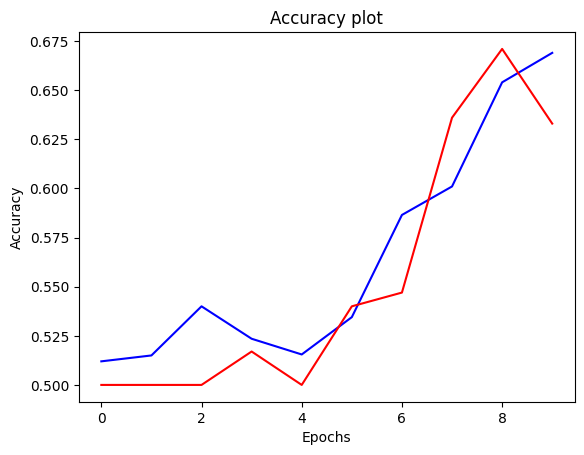

In [20]:
plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy plot')
plt.show()

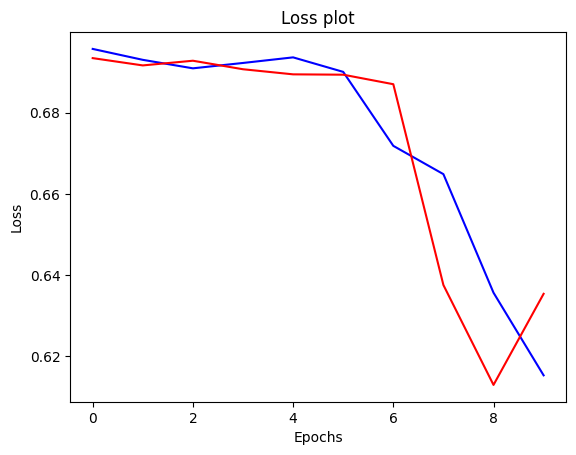

In [21]:
plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Loss plot')
plt.show()

# VGG-16 implementation

In [22]:
base_model = keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))
base_model.trainable=False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [23]:
model = keras.Sequential()
model.add(keras.Input(shape=(224,224,3), name='InputLayer'))
model.add(base_model)
model.add(keras.layers.Flatten(name='FlattenLayer'))
model.add(keras.layers.Dense(256, activation='relu', name='DenseLayer1'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu', name='DenseLayer2'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid', name='OutputLayer'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FlattenLayer (Flatten)               │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ DenseLayer1 (Dense)                  │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ DenseLayer2 (Dense)                  │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,170,497 (80.76 MB)

 Trainable params: 6,455,809 (24.63 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [24]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=['acc'])

In [25]:
history = model.fit(train_generator, epochs=10, batch_size=32, validation_data=valid_generator)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 429ms/step - acc: 0.6008 - loss: 0.7727 - val_acc: 0.8600 - val_loss: 0.3632
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 244ms/step - acc: 0.8138 - loss: 0.4166 - val_acc: 0.8900 - val_loss: 0.2932
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 208ms/step - acc: 0.8804 - loss: 0.3125 - val_acc: 0.8960 - val_loss: 0.2450
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 193ms/step - acc: 0.8847 - loss: 0.2801 - val_acc: 0.9040 - val_loss: 0.2277
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 213ms/step - acc: 0.9278 - loss: 0.1981 - val_acc: 0.9050 - val_loss: 0.2331
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - acc: 0.9356 - loss: 0.1726 - val_acc: 0.8970 - val_loss: 0.2348
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 214ms/step - acc: 0.9305 - loss: 0.1652 - val_acc: 0.9090 - val_loss: 0.2170
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 193ms/step - acc: 0.9557 - loss: 0.1297 - val_acc: 0.9120 - val_loss: 0.2172
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 209ms/

In [26]:
acc, val_acc = history.history['acc'], history.history['val_acc']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = ([x for x in range(1,11)])

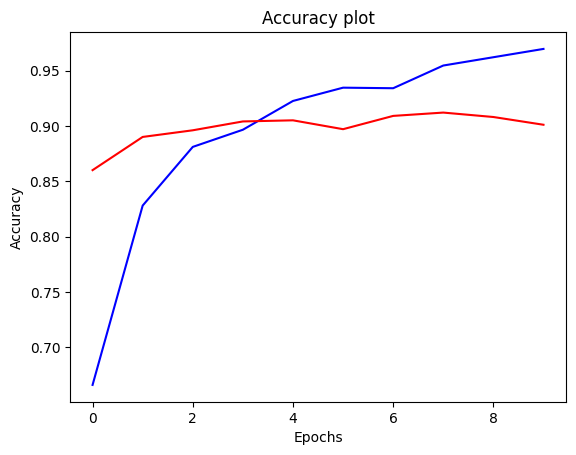

In [27]:
plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy plot')
plt.show()

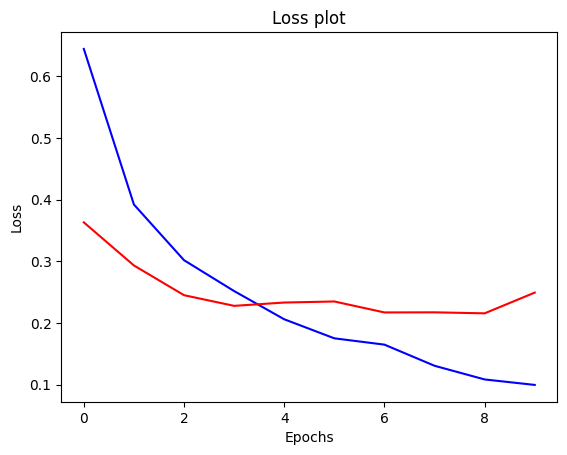

In [28]:
plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Loss plot')
plt.show()

# ResNet50 implementation

In [29]:
base_model = keras.applications.ResNet50(include_top=False, weights='imagenet')
base_model.trainable=False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [30]:
model = keras.Sequential()
model.add(keras.Input(shape=(224,224,3), name='InputLayer'))
model.add(base_model)
model.add(keras.layers.Flatten(name='FlattenLayer'))
model.add(keras.layers.Dense(256, activation='relu', name='DenseLayer1'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu', name='DenseLayer2'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid', name='OutputLayer'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FlattenLayer (Flatten)               │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ DenseLayer1 (Dense)                  │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ DenseLayer2 (Dense)                  │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,311,105 (188.11 MB)

 Trainable params: 25,723,393 (98.13 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [31]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=['acc'])

In [32]:
history = model.fit(train_generator, epochs=10, batch_size=32, validation_data=valid_generator)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 313ms/step - acc: 0.5016 - loss: 1.0117 - val_acc: 0.5740 - val_loss: 0.6849
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 143ms/step - acc: 0.5324 - loss: 0.6966 - val_acc: 0.5000 - val_loss: 0.6859
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - acc: 0.5310 - loss: 0.6879 - val_acc: 0.6220 - val_loss: 0.6793
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - acc: 0.5520 - loss: 0.6823 - val_acc: 0.5210 - val_loss: 0.6898
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - acc: 0.5222 - loss: 0.6862 - val_acc: 0.5130 - val_loss: 0.6904
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - acc: 0.5093 - loss: 0.6894 - val_acc: 0.5100 - val_loss: 0.6905
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - acc: 0.5062 - loss: 0.6915 - val_acc: 0.5840 - val_loss: 0.6859
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 171ms/step - acc: 0.5441 - loss: 0.6860 - val_acc: 0.5070 - val_loss: 0.6917
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/st

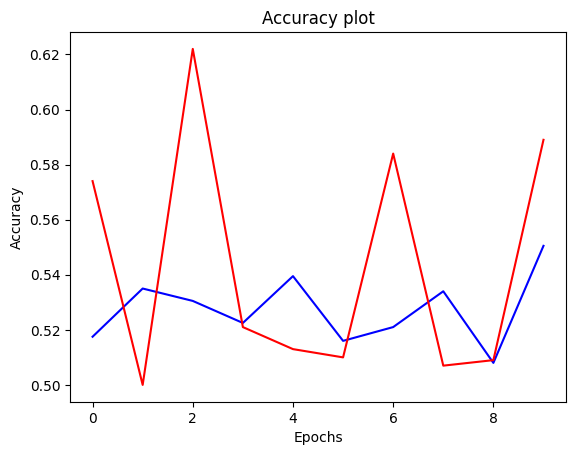

In [33]:
acc, val_acc = history.history['acc'], history.history['val_acc']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = ([x for x in range(1,11)])

plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy plot')
plt.show()

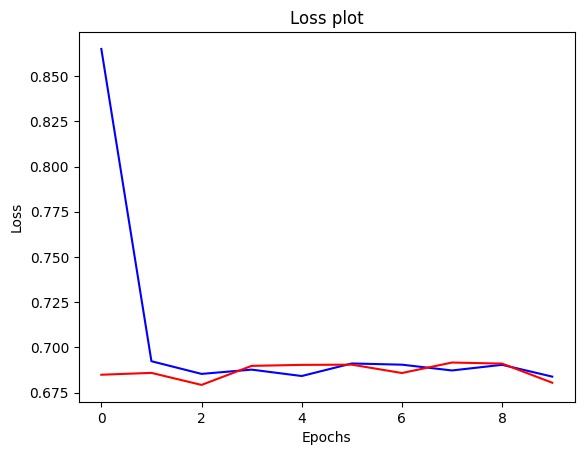

In [34]:
plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Loss plot')
plt.show()

# InceptionV3 implementation

In [35]:
base_model = keras.applications.InceptionV3(include_top=False, weights='imagenet')
base_model.trainable=False

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [39]:
model = keras.Sequential()
model.add(keras.Input(shape=(224,224,3), name='InputLayer'))
model.add(base_model)
model.add(keras.layers.Flatten(name='FlattenLayer'))
model.add(keras.layers.Dense(256, activation='relu', name='DenseLayer1'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu', name='DenseLayer2'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid', name='OutputLayer'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FlattenLayer (Flatten)               │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ DenseLayer1 (Dense)                  │ (None, 256)                 │      13,107,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ DenseLayer2 (Dense)                  │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,943,265 (133.30 MB)

 Trainable params: 13,140,481 (50.13 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [40]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=['acc'])

In [41]:
history = model.fit(train_generator, epochs=10, batch_size=32, validation_data=valid_generator)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 416ms/step - acc: 0.8322 - loss: 0.4882 - val_acc: 0.9860 - val_loss: 0.0516
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - acc: 0.9616 - loss: 0.1305 - val_acc: 0.9830 - val_loss: 0.0497
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - acc: 0.9813 - loss: 0.0688 - val_acc: 0.9840 - val_loss: 0.0536
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - acc: 0.9870 - loss: 0.0435 - val_acc: 0.9820 - val_loss: 0.0920
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - acc: 0.9842 - loss: 0.0405 - val_acc: 0.9860 - val_loss: 0.0575
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - acc: 0.9941 - loss: 0.0220 - val_acc: 0.9880 - val_loss: 0.0413
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - acc: 0.9916 - loss: 0.0216 - val_acc: 0.9860 - val_loss: 0.0572
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - acc: 0.9953 - loss: 0.0131 - val_acc: 0.9860 - val_loss: 0.0480
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/ste

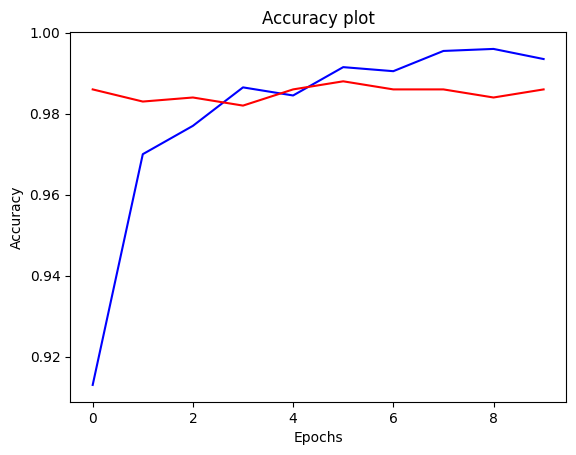

In [42]:
acc, val_acc = history.history['acc'], history.history['val_acc']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = ([x for x in range(1,11)])

plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy plot')
plt.show()

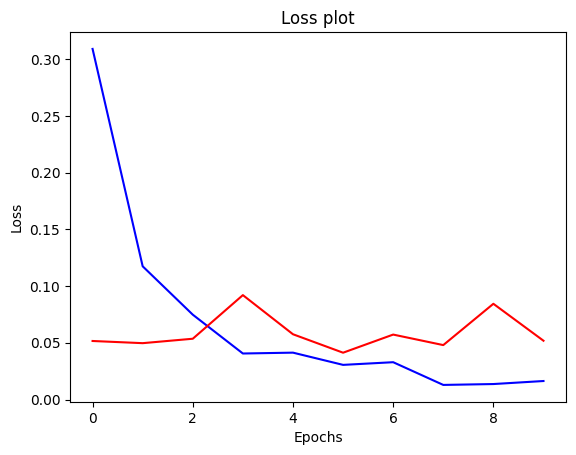

In [43]:
plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Loss plot')
plt.show()

# EfficientNetB0 implementation

In [44]:
base_model = keras.applications.EfficientNetB0(include_top=False, weights='imagenet')
base_model.trainable=False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [45]:
model = keras.Sequential()
model.add(keras.Input(shape=(224,224,3), name='InputLayer'))
model.add(base_model)
model.add(keras.layers.Flatten(name='FlattenLayer'))
model.add(keras.layers.Dense(256, activation='relu', name='DenseLayer1'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu', name='DenseLayer2'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid', name='OutputLayer'))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FlattenLayer (Flatten)               │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ DenseLayer1 (Dense)                  │ (None, 256)                 │      16,056,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ DenseLayer2 (Dense)                  │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,139,172 (76.82 MB)

 Trainable params: 16,089,601 (61.38 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [46]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=['acc'])

In [47]:
history = model.fit(train_generator, epochs=10, batch_size=32, validation_data=valid_generator)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 54s 481ms/step - acc: 0.5116 - loss: 0.9775 - val_acc: 0.5000 - val_loss: 0.6932
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - acc: 0.5208 - loss: 0.6937 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - acc: 0.5142 - loss: 0.6931 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - acc: 0.5242 - loss: 0.6931 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - acc: 0.4984 - loss: 0.6931 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - acc: 0.5099 - loss: 0.6932 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - acc: 0.5015 - loss: 0.6937 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - acc: 0.4939 - loss: 0.6931 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - a

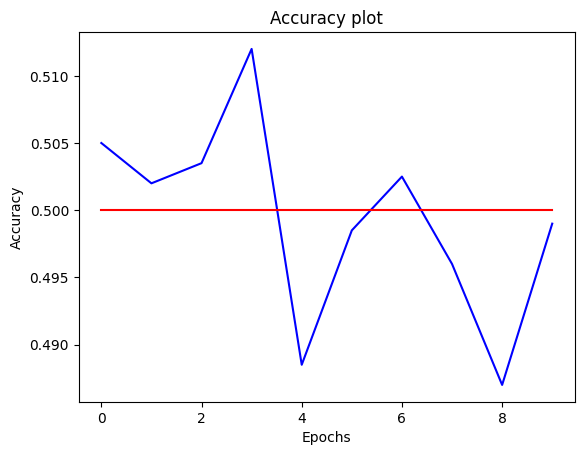

In [48]:
acc, val_acc = history.history['acc'], history.history['val_acc']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = ([x for x in range(1,11)])

plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy plot')
plt.show()

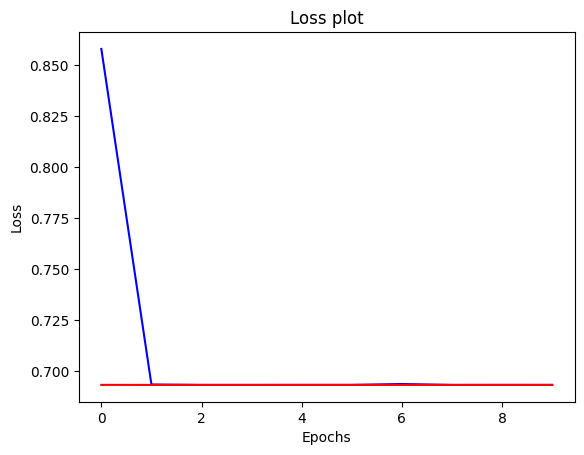

In [49]:
plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Loss plot')
plt.show()

# MobileNetV2 implementation

In [50]:
base_model = keras.applications.MobileNetV2(include_top=False, weights='imagenet')
base_model.trainable=False

<ipython-input-50-92eeec25c3db>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNetV2(include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [51]:
model = keras.Sequential()
model.add(keras.Input(shape=(224,224,3), name='InputLayer'))
model.add(base_model)
model.add(keras.layers.Flatten(name='FlattenLayer'))
model.add(keras.layers.Dense(256, activation='relu', name='DenseLayer1'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu', name='DenseLayer2'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid', name='OutputLayer'))

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FlattenLayer (Flatten)               │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ DenseLayer1 (Dense)                  │ (None, 256)                 │      16,056,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ DenseLayer2 (Dense)                  │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,347,585 (69.99 MB)

 Trainable params: 16,089,601 (61.38 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [52]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=['acc'])

In [53]:
history = model.fit(train_generator, epochs=10, batch_size=32, validation_data=valid_generator)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 239ms/step - acc: 0.8747 - loss: 0.3863 - val_acc: 0.9730 - val_loss: 0.1058
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - acc: 0.9633 - loss: 0.1642 - val_acc: 0.9810 - val_loss: 0.0648
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - acc: 0.9740 - loss: 0.0731 - val_acc: 0.9770 - val_loss: 0.0873
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - acc: 0.9753 - loss: 0.0772 - val_acc: 0.9760 - val_loss: 0.1001
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - acc: 0.9823 - loss: 0.0563 - val_acc: 0.9830 - val_loss: 0.0939
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - acc: 0.9865 - loss: 0.0418 - val_acc: 0.9790 - val_loss: 0.1000
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - acc: 0.9913 - loss: 0.0216 - val_acc: 0.9820 - val_loss: 0.1019
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - acc: 0.9929 - loss: 0.0268 - val_acc: 0.9770 - val_loss: 0.1107
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - 

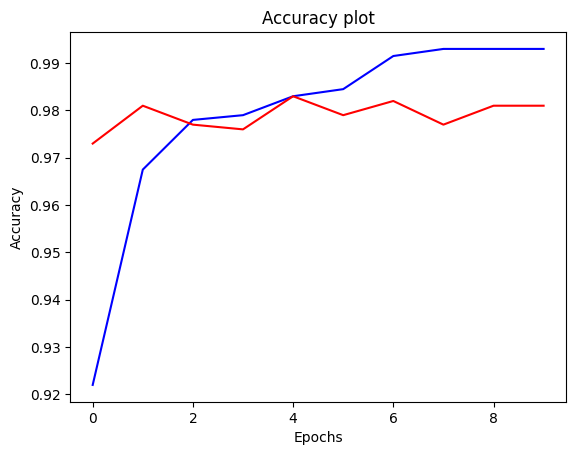

In [54]:
acc, val_acc = history.history['acc'], history.history['val_acc']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = ([x for x in range(1,11)])

plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy plot')
plt.show()

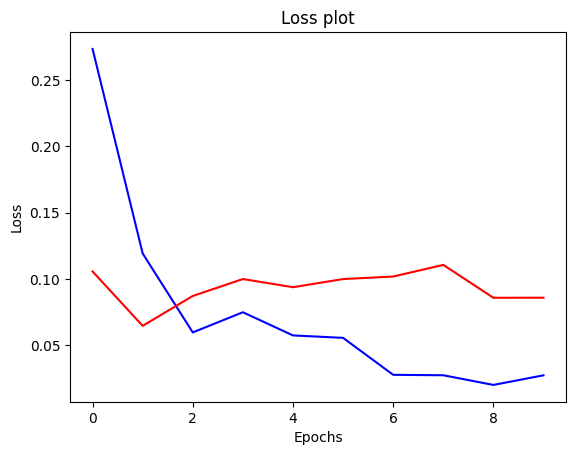

In [55]:
plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Loss plot')
plt.show()